In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sklearn.cluster import KMeans
import numpy as np
import cv2 as cv2
%matplotlib inline


In [9]:
model = YOLO("yolov8l.pt")

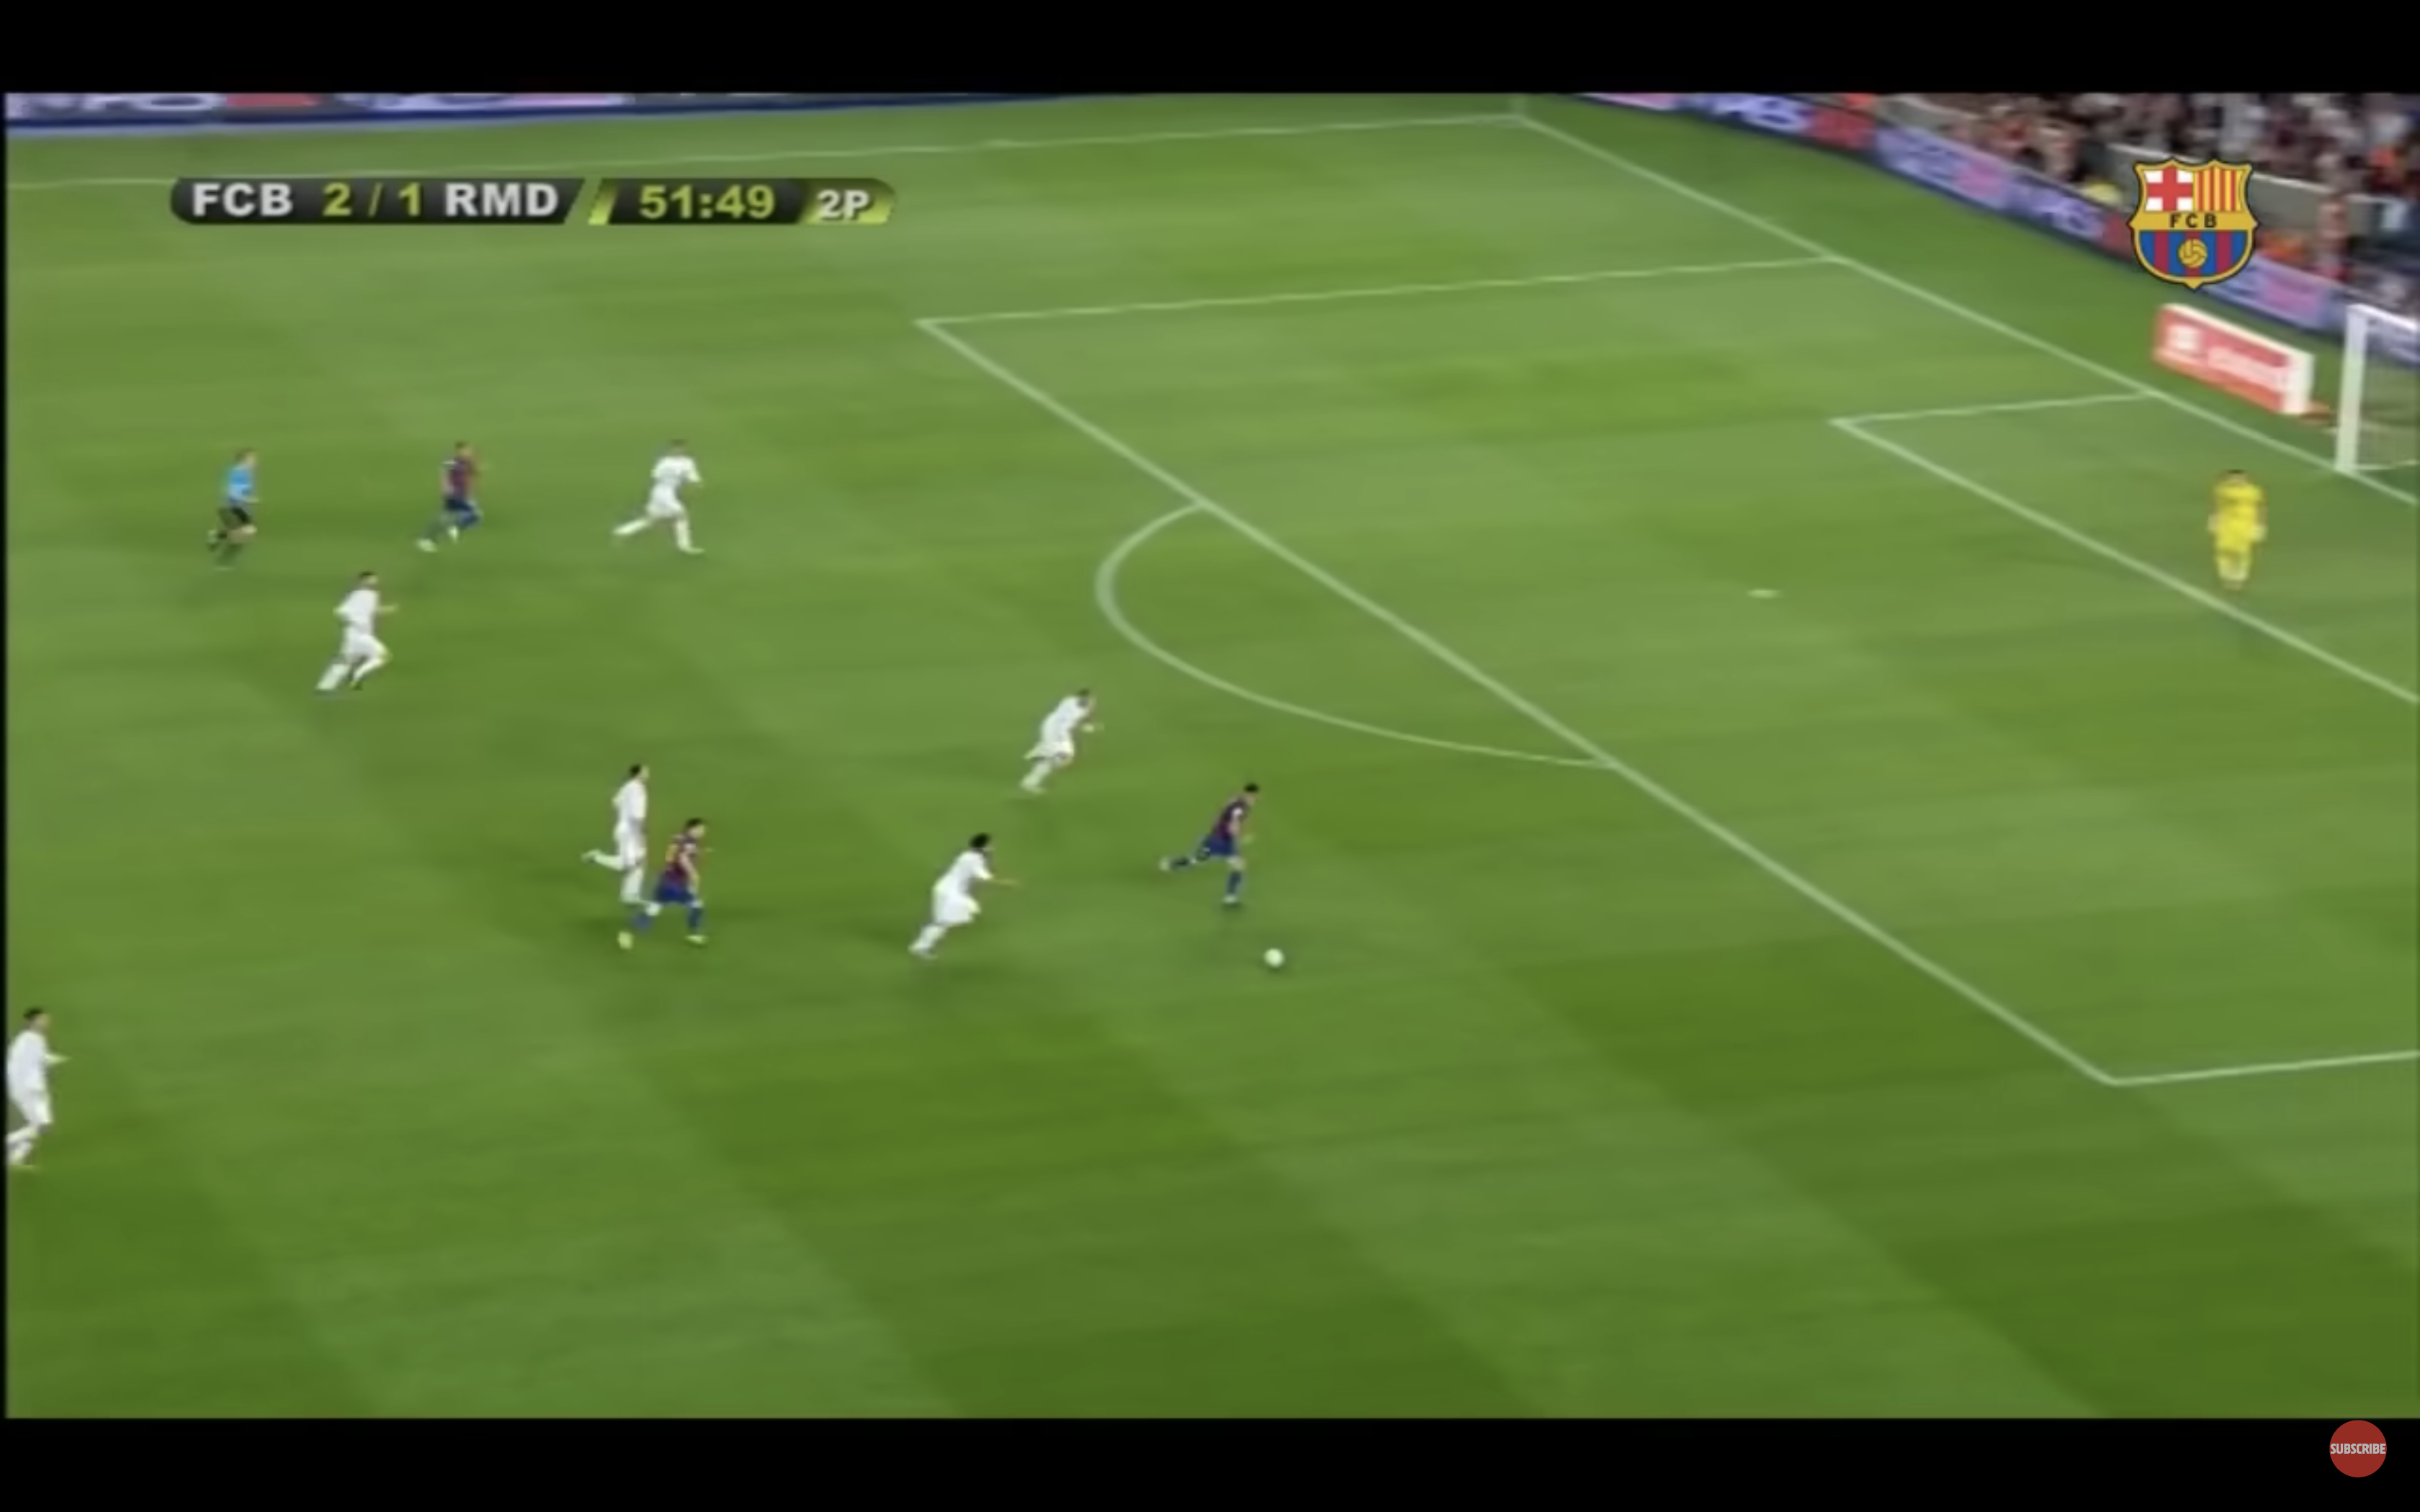

In [10]:
display(Image(filename='sshot.png'))

In [11]:
results = model("sshot.png", classes=0)

Ultralytics YOLOv8.0.43 🚀 Python-3.7.11 torch-1.11.0 CPU
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 /Users/ashhadulislam/projects/other_misc/abdelRahman/sshot.png: 416x640 10 persons, 1226.3ms
Speed: 1.0ms preprocess, 1226.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


In [12]:
print("Number of people detected=",len(results[0].boxes))

Number of people detected= 10


In [13]:
len(results[0].boxes)

10

In [14]:
im=cv2.imread("sshot.png")
color = (0, 0, 0)
thickness = 2

for i in range(len(results[0].boxes)):
    co_ords=results[0].boxes[i].xyxy.detach().numpy()
    start_point=(int(co_ords[0][0]),int(co_ords[0][1]))
    end_point=(int(co_ords[0][2]),int(co_ords[0][3]))
    print("co",co_ords)
    im = cv2.rectangle(im, start_point, end_point, color, thickness)


co [[       1412         954        1532        1105]]
co [[        436         791         556         966]]
co [[        848         606         981         772]]
co [[          9        1399          99        1621]]
co [[       1607        1083        1751        1264]]
co [[       1260        1155        1418        1335]]
co [[        857        1135         990        1321]]
co [[        577         611         673         769]]
co [[        286         622         360         768]]
co [[        846        1060         905        1290]]


In [15]:
plt.imsave("ss_boxes.png",im)

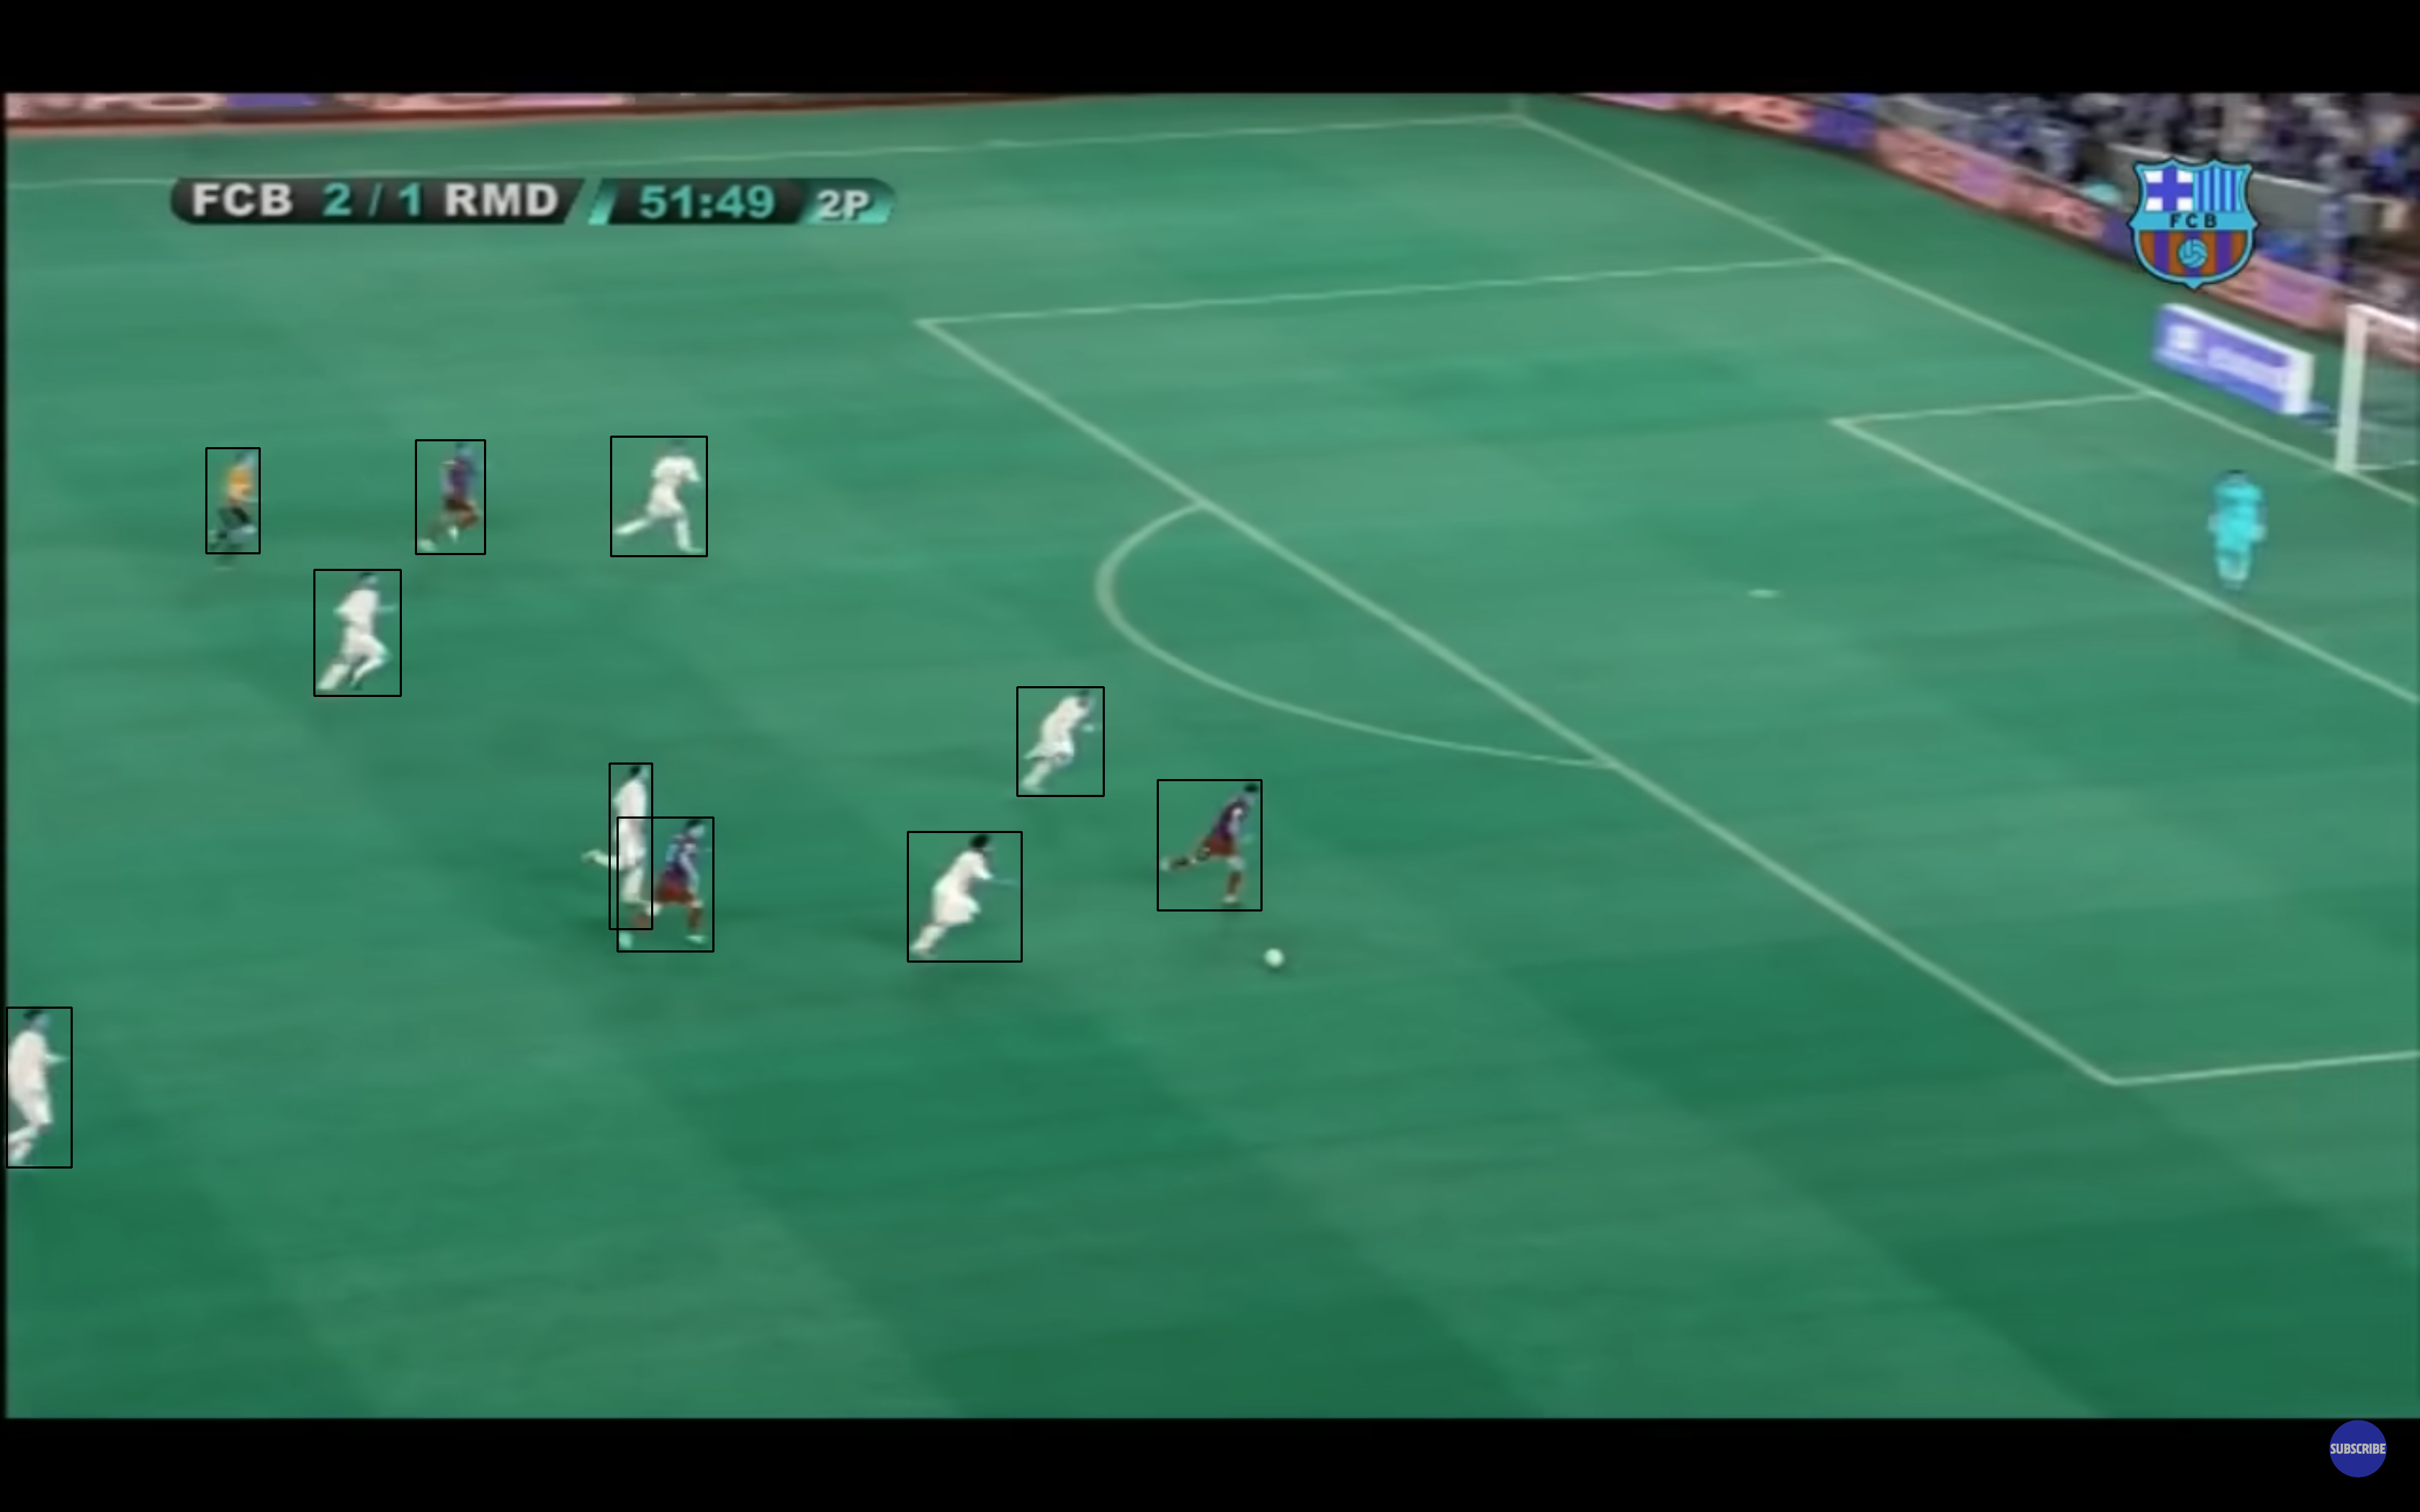

In [16]:

display(Image(filename='ss_boxes.png'))

# Calculate pixel colors

##  Using K-Means clustering

In [17]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()
#     display(Image(img_1))
#     display(Image(img_2))

def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

[       1412         954        1532        1105]


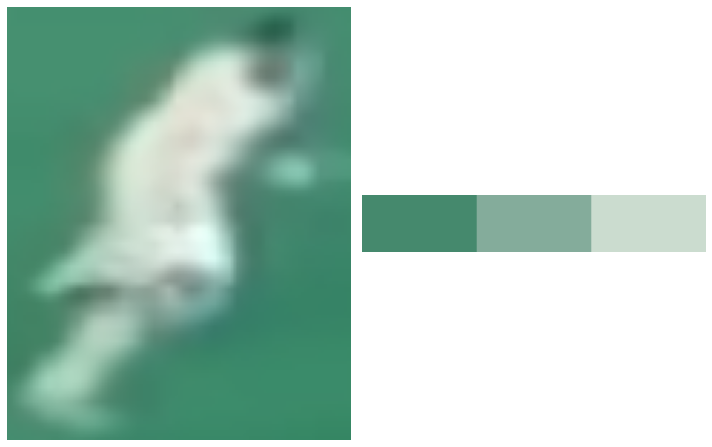

[        436         791         556         966]


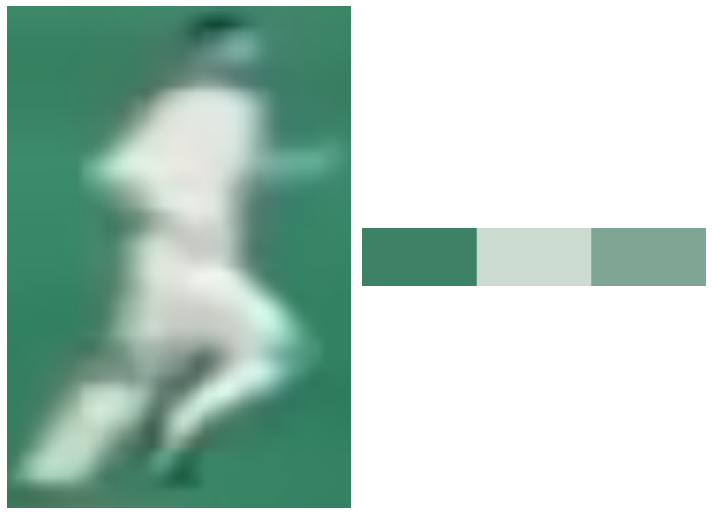

[        848         606         981         772]


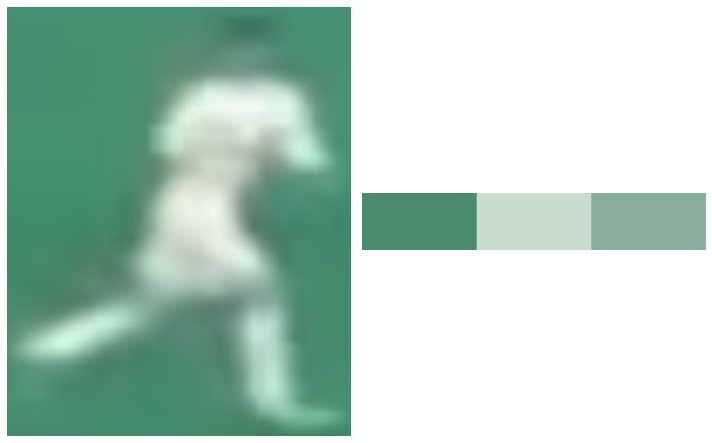

[          9        1399          99        1621]


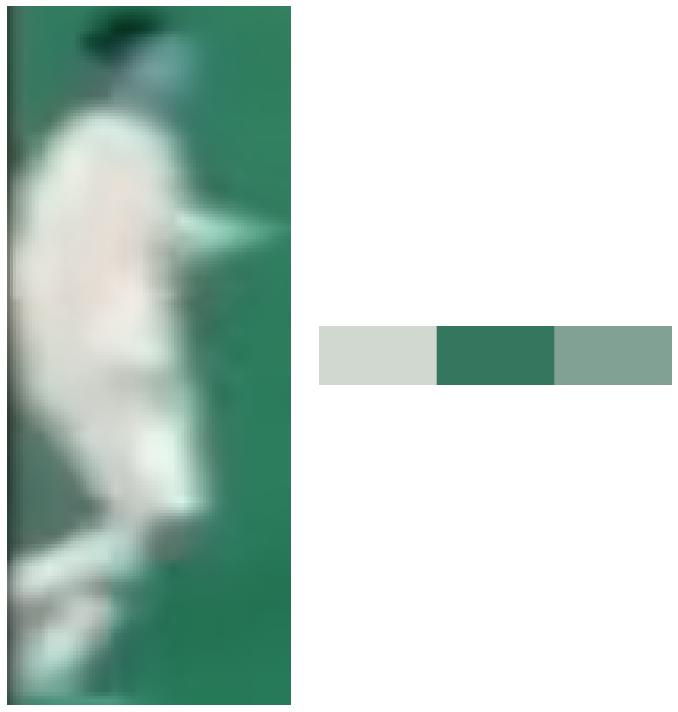

[       1607        1083        1751        1264]


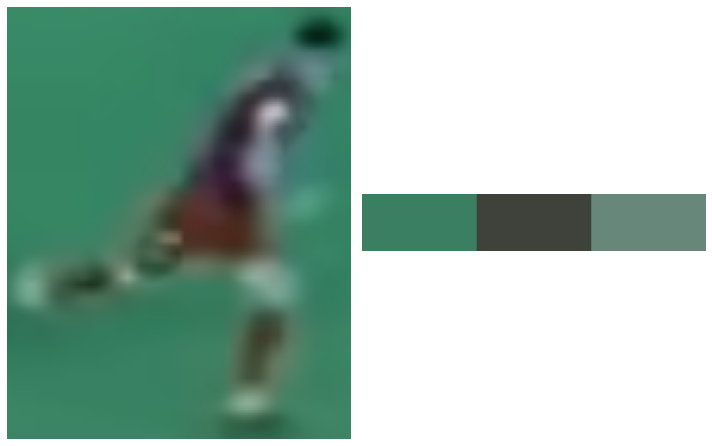

[       1260        1155        1418        1335]


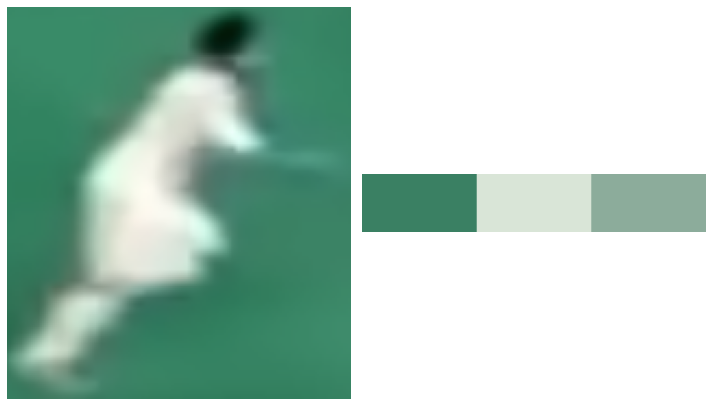

[        857        1135         990        1321]


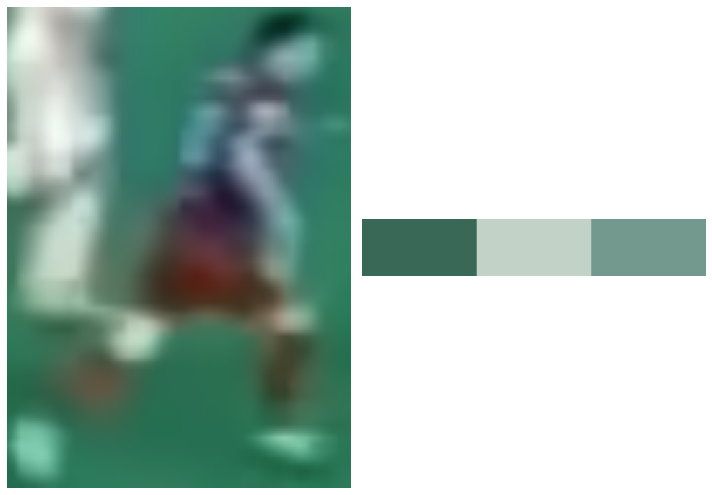

[        577         611         673         769]


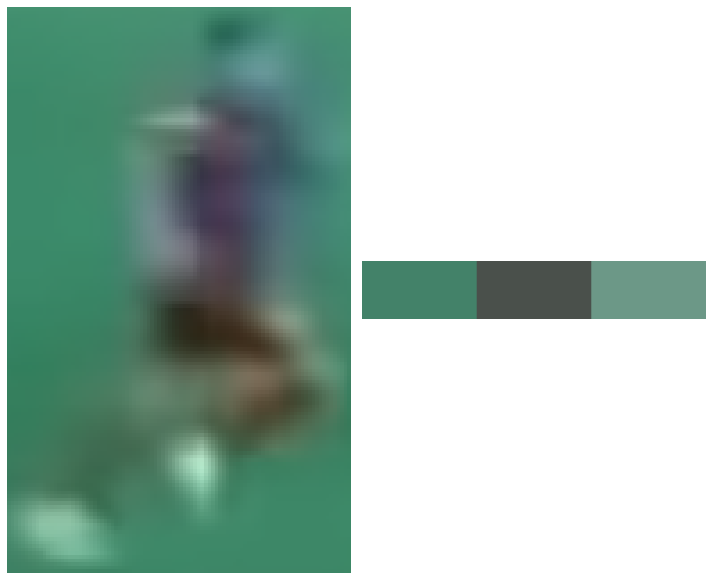

[        286         622         360         768]


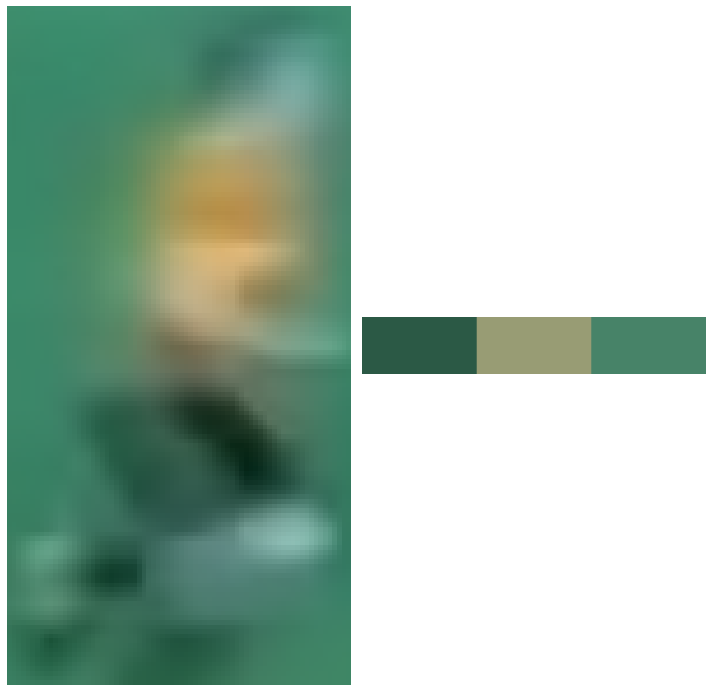

[        846        1060         905        1290]


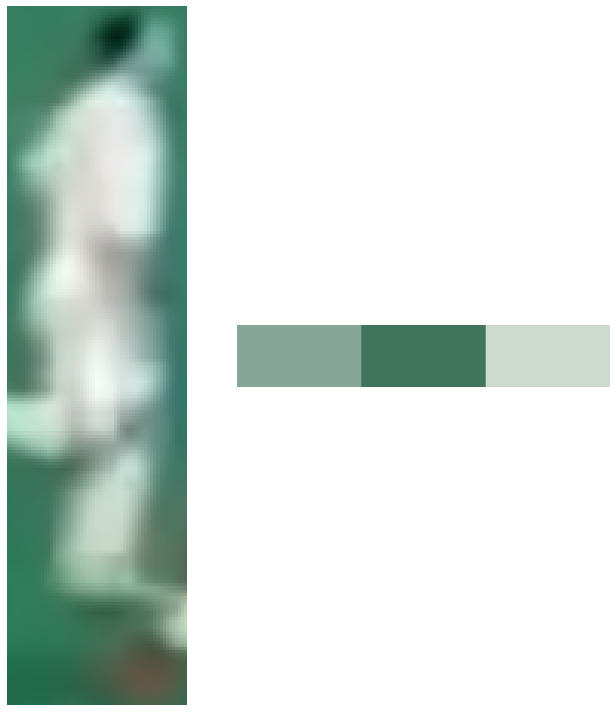

In [19]:
im=cv2.imread("sshot.png")
for i in range(len(results[0].boxes)):
    co_ords=results[0].boxes[i].xyxy.detach().numpy()
    co_ords=co_ords[0]
    print(co_ords)
    x1=int(co_ords[0])
    y1=int(co_ords[1])
    x2=int(co_ords[2])
    y2=int(co_ords[3])
    h=y2-y1
    w=x2-x1
    crop_img = im[y1:y1+h, x1:x1+w]
    plt.imsave("ss_boxes"+str(i)+".png",crop_img)
    
    clt_3 = KMeans(n_clusters=3)
    clt_3.fit(crop_img.reshape(-1, 3))
    show_img_compar(crop_img, palette(clt_3))
    
    